# Employee Attrition Modeling and Analysis

Employee turnover and attrition pose significant challenges for workforce stability and organizational growth. Understanding the factors influencing employee attrition is crucial for developing targeted retention strategies. ​
​
Given an employee dataset containing demographic, job-related, and satisfaction-related attributes, our objective is to analyze patterns and identify key drivers of employee attrition.​

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score, roc_auc_score, roc_curve, auc, classification_report, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Exploratory Data Analysis

#### Load data

In [2]:
att_raw = pd.read_csv("HR_analytics.csv", index_col = "EmpID")
att_raw.head()

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmpID,,,,,,,,,,,,,,,,,,,,,
RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,...,3,80,0,0,2,3,0,0,0,0.0
RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,...,1,80,0,0,2,3,0,0,0,0.0
RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,...,4,80,0,0,3,3,0,0,0,0.0
RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,...,4,80,0,0,2,3,0,0,0,0.0
RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,...,4,80,0,0,0,3,0,0,0,0.0


In [3]:
att_raw.shape

(1480, 37)

#### Analyze data types

In [4]:
att_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1480 entries, RM297 to RM1210
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1480 non-null   int64  
 1   AgeGroup                  1480 non-null   object 
 2   Attrition                 1480 non-null   object 
 3   BusinessTravel            1480 non-null   object 
 4   DailyRate                 1480 non-null   int64  
 5   Department                1480 non-null   object 
 6   DistanceFromHome          1480 non-null   int64  
 7   Education                 1480 non-null   int64  
 8   EducationField            1480 non-null   object 
 9   EmployeeCount             1480 non-null   int64  
 10  EmployeeNumber            1480 non-null   int64  
 11  EnvironmentSatisfaction   1480 non-null   int64  
 12  Gender                    1480 non-null   object 
 13  HourlyRate                1480 non-null   int64  
 14  JobInvo

#### Distribution statistics on numerical columns

In [5]:
att_raw.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,...,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,...,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,...,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Check Missing Values

In [6]:
missing = att_raw.isna().sum()
missing = pd.DataFrame(missing)

# Display columns with missing values
missing[missing[0] != 0]

,0
YearsWithCurrManager,57


YearsWithCurrManager appears to be the only variable with missing values. We will plan on imputing this column when we get to the data preprocessing.

#### Check duplicates

In [7]:
# Identify duplicate rows
duplicate_rows = att_raw[att_raw.duplicated()]

# Print the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
        Age AgeGroup Attrition     BusinessTravel  DailyRate  \
EmpID                                                          
RM1468   27    26-35        No      Travel_Rarely        155   
RM1461   29    26-35        No      Travel_Rarely        468   
RM1464   31    26-35        No         Non-Travel        325   
RM1470   34    26-35        No       TravelRarely        628   
RM1463   39    36-45        No      Travel_Rarely        722   
RM1469   49    46-55        No  Travel_Frequently       1023   
RM1462   50    46-55       Yes      Travel_Rarely        410   

                    Department  DistanceFromHome  Education EducationField  \
EmpID                                                                        
RM1468  Research & Development                 4          3  Life Sciences   
RM1461  Research & Development                28          4        Medical   
RM1464  Research & Development                 5          3        Medical   
RM1470  Research 

There are 7 rows that are duplicates. We will remove these in the data preprocessing section.

#### Assign Categorical and Numerical features

In [8]:
# Identify categorical features
categorical_features = ['AgeGroup','BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement', 'JobLevel', 
                        'JobRole','JobSatisfaction', 'MaritalStatus','SalarySlab','Over18','OverTime','PerformanceRating', 'RelationshipSatisfaction',
                        'StockOptionLevel','WorkLifeBalance']

# Identify numerical features
numerical_features = ['Age','DailyRate','DistanceFromHome','EmployeeCount', 'EmployeeNumber', 'HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked',
                      'PercentSalaryHike','StandardHours','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion',
                      'YearsWithCurrManager']

# Categorical features with the target variable
categorical_features_w_target = categorical_features.copy()
categorical_features_w_target.insert(0, 'Attrition')

# Ensure every column was captured (should be 36 columns)
print(len(categorical_features) + len(numerical_features))

36


#### Plot

Numerical Feature Histograms:


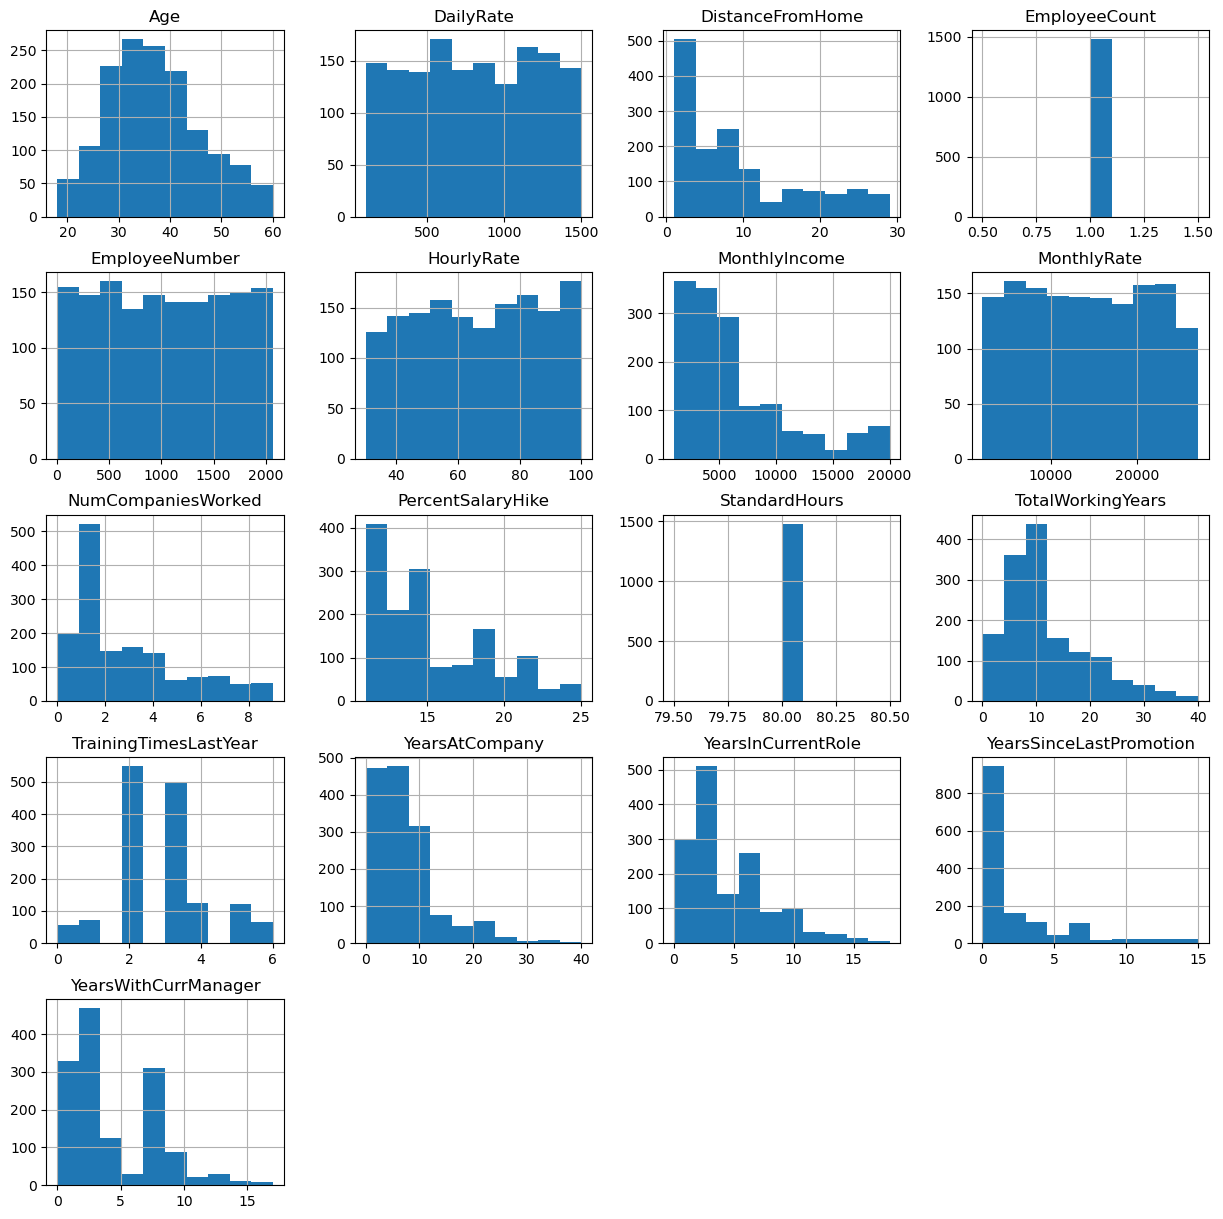

In [9]:
att_raw.hist(numerical_features, figsize=(15,15))
print('Numerical Feature Histograms:')
plt.show()

The histograms provide insights into key employee attributes that may influence attrition. Age follows a roughly normal distribution, peaking around the 30s, while salary-related variables like MonthlyIncome and TotalWorkingYears are right-skewed, indicating a concentration of employees in lower income and experience ranges. DistanceFromHome is also right-skewed, suggesting most employees live close to work. Variables like NumCompaniesWorked, YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager, and YearsSinceLastPromotion exhibit right-skewed distributions, implying that many employees have relatively short tenures and limited job movement. DailyRate, HourlyRate, and MonthlyRate appear uniformly distributed, while PercentSalaryHike and TrainingTimesLastYear have peaks at lower values. Notably, EmployeeCount and StandardHours are constants, offering no variability. These patterns can help identify potential drivers of attrition, such as salary, tenure, or commuting distance.

Categorical Feature Histograms:


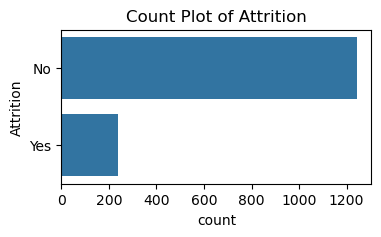

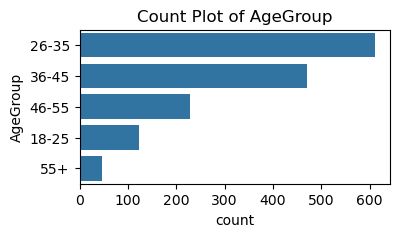

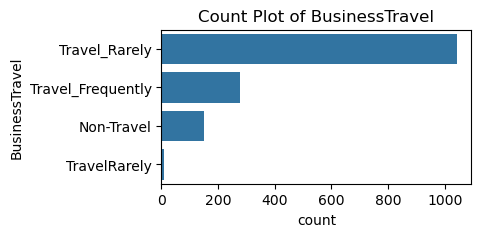

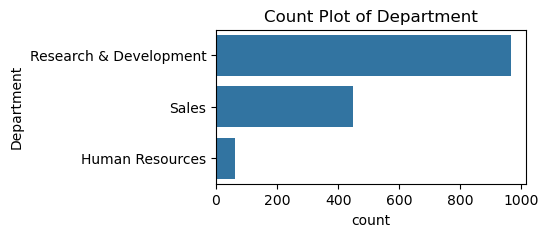

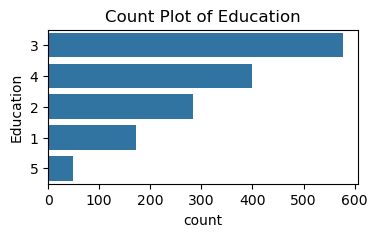

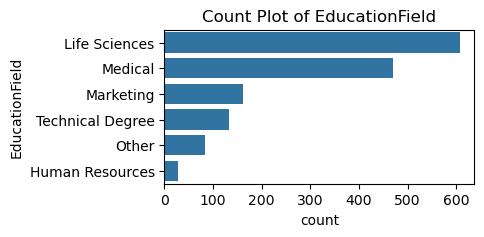

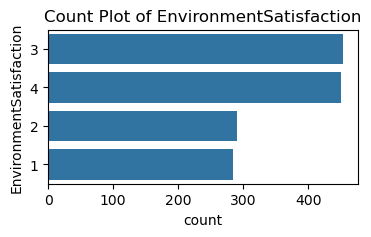

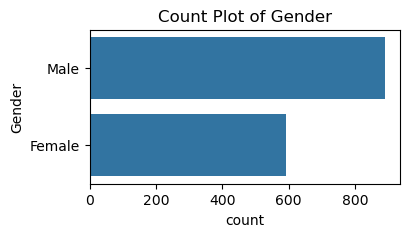

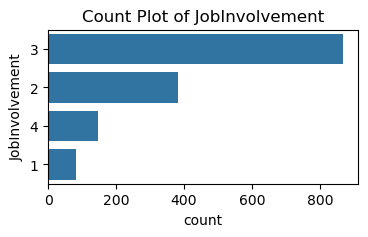

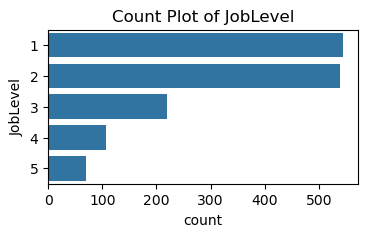

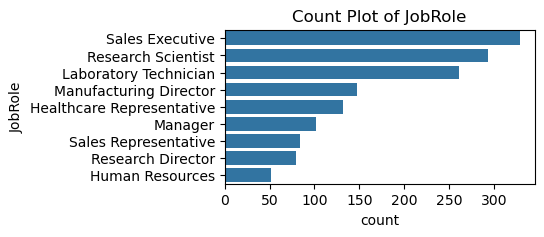

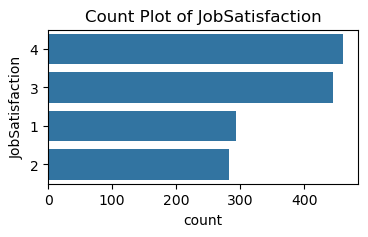

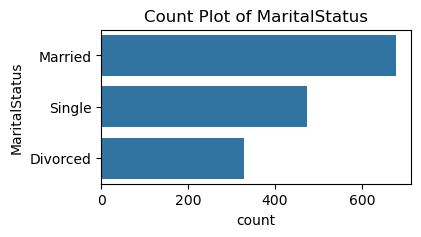

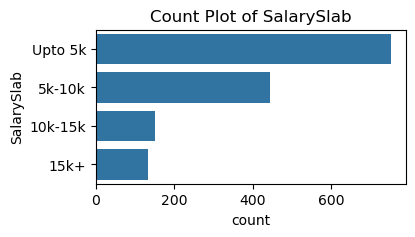

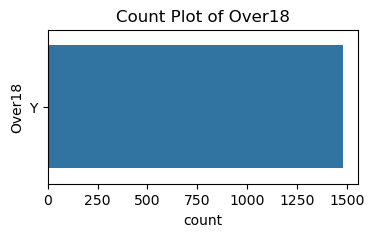

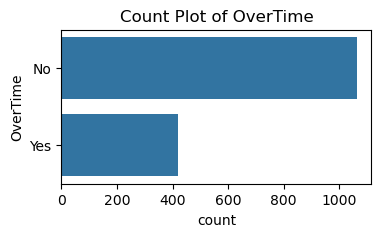

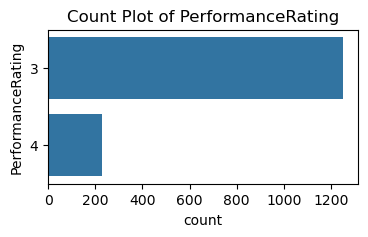

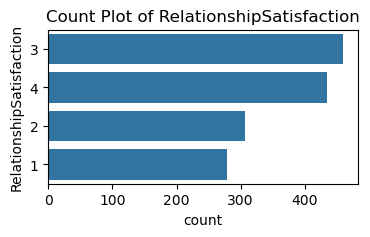

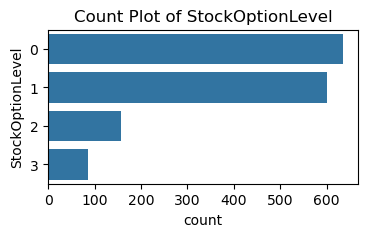

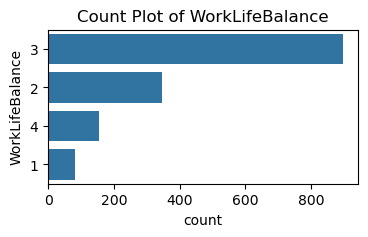

In [10]:
# Plot categorical features with target
print('Categorical Feature Histograms:')
for col in categorical_features_w_target:
    plt.figure(figsize=(4, 2))
    sns.countplot(y=att_raw[col], order=att_raw[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.show()

The above counts of categorical variables also provide insight into the target variable. First and foremost, we see an attrition rate of around 16%. 10% according to online sources is an ideal attrition rate across white-collar industries, so that should be the objective of our analysis. Stock option level also bifurcates the data in a presumably meaningful way. We can see from JobRole that most people are in Sales or are a research scientist or a lab technician. Perhaps different roles have different attrition rates, which would play a large part into our model. AgeGroup is also unevenly distributed. It might help us explain some attrition, as very young employees might be more likely to "job hop" and older employees might be more settled into their roles.

#### Outlier Analysis

In [11]:
# Calc outliers w IQR
def count_outliers(df, cols):
    outlier_counts = {}
    
    for col in cols:
        Q1 = df[col].quantile(0.25) 
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1  
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count values outside range
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outliers

    return outlier_counts

# Outliers counts for num columns
outlier_dict = count_outliers(att_raw, numerical_features)

# Make df to sort and see
outlier_df = pd.DataFrame(list(outlier_dict.items()), columns=['Feature', 'Outlier Count'])
outlier_df = outlier_df.sort_values(by='Outlier Count', ascending=False)
outlier_df[outlier_df['Outlier Count'] != 0]

,Feature,Outlier Count
12,TrainingTimesLastYear,240
6,MonthlyIncome,114
15,YearsSinceLastPromotion,108
13,YearsAtCompany,105
11,TotalWorkingYears,63
8,NumCompaniesWorked,52
14,YearsInCurrentRole,21
16,YearsWithCurrManager,13


Outliers in key features like TrainingTimesLastYear, MonthlyIncome, and YearsSinceLastPromotion likely capture meaningful patterns in employee attrition rather than data errors. Removing them could weaken the model’s ability to learn from crucial trends, such as how long periods without promotion or frequent job changes impact turnover. Features like YearsAtCompany, TotalWorkingYears, and NumCompaniesWorked provide valuable insights into tenure and career stability, making their outliers essential for predicting attrition. Instead of dropping them, we should validate extreme values, consider transformations for skewed data, and use robust models like tree-based methods that handle outliers effectively.

In [12]:
# Validate statistics for outlier columns
att_raw[['TrainingTimesLastYear', 'MonthlyIncome', 'YearsSinceLastPromotion', 'YearsAtCompany', 'TotalWorkingYears', 'NumCompaniesWorked', 'YearsInCurrentRole', 'YearsWithCurrManager']].describe()

,TrainingTimesLastYear,MonthlyIncome,YearsSinceLastPromotion,YearsAtCompany,TotalWorkingYears,NumCompaniesWorked,YearsInCurrentRole,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,2.797973,6504.985811,2.182432,7.009459,11.281757,2.687162,4.228378,4.118060
std,1.288791,4700.261400,3.219357,6.117945,7.770870,2.494098,3.616020,3.555484
min,0.000000,1009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2922.250000,0.000000,3.000000,6.000000,1.000000,2.000000,2.000000
50%,3.000000,4933.000000,1.000000,5.000000,10.000000,2.000000,3.000000,3.000000
75%,3.000000,8383.750000,3.000000,9.000000,15.000000,4.000000,7.000000,7.000000
max,6.000000,19999.000000,15.000000,40.000000,40.000000,9.000000,18.000000,17.000000


Looking at min and max values for each of the columns with outliers, we are not seeing any unexpected values (i.e. negative values or values that do not seem logically possible based on the column). So, as mentioned above, we are going to leave the outliers in the dataset, since we believe they are legitimate values that will contribute to identifying meaningful patterns in our data.

#### Correlation

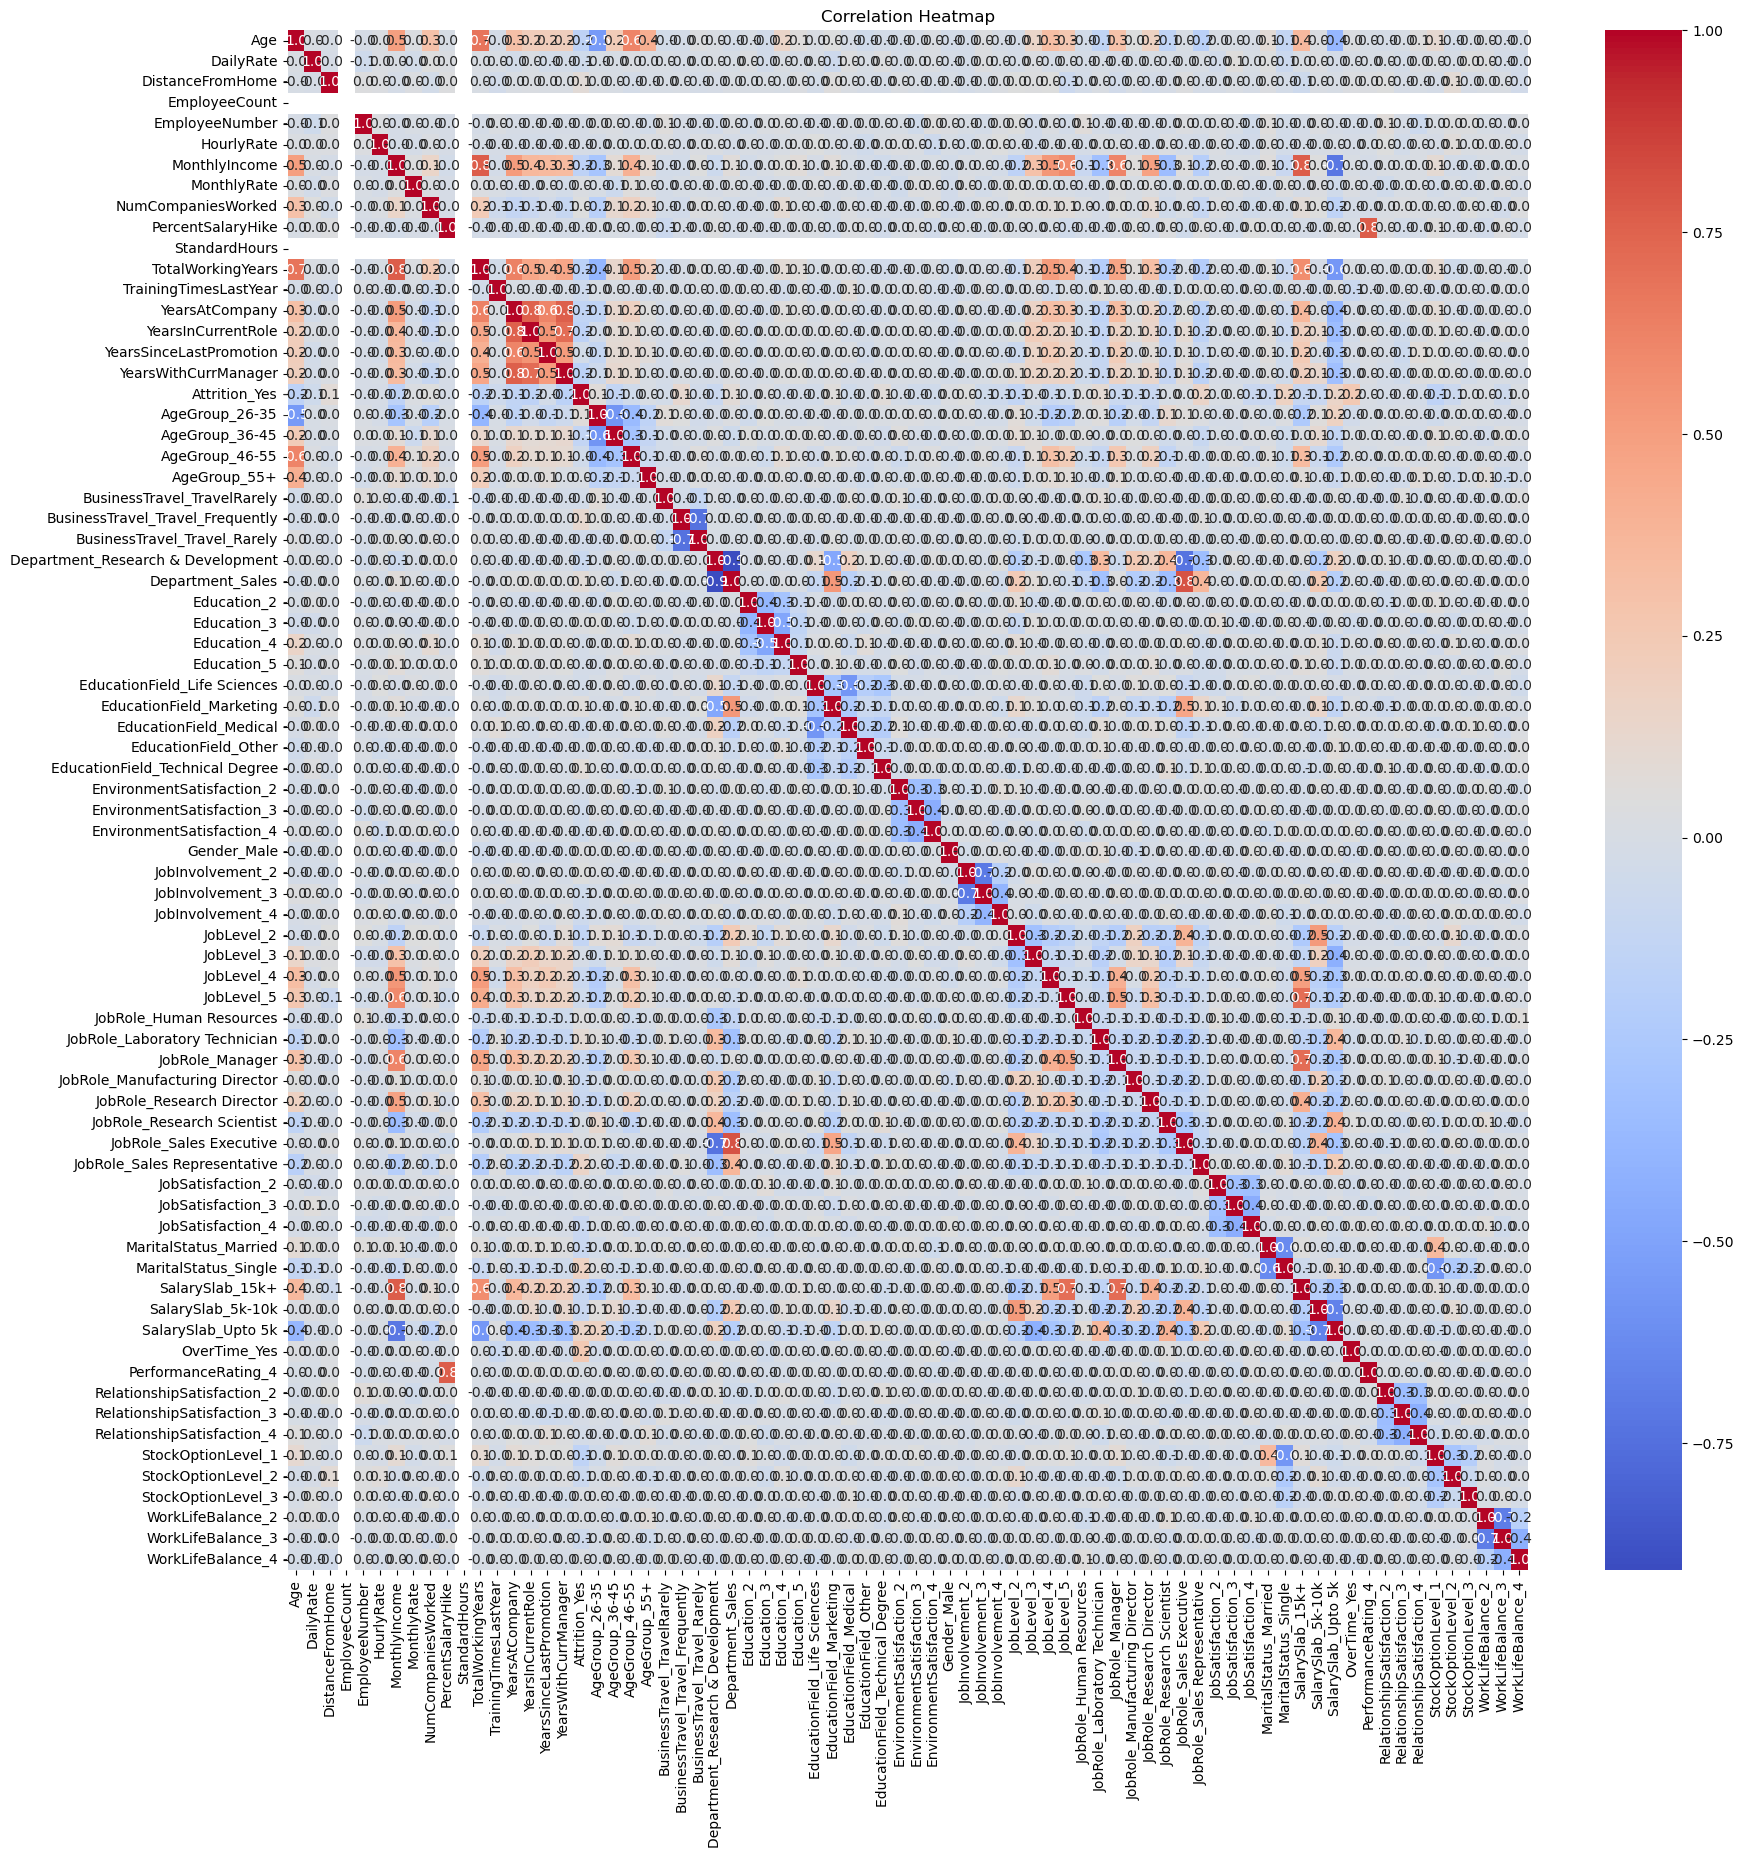

In [13]:
# Correlation heatmap
att_dummies = pd.get_dummies(att_raw, columns=categorical_features_w_target, drop_first=True)
correlation_matrix = att_dummies.corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()

In [14]:
# Get correlations from matrix
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Remove NaN values
corr_pairs = corr_pairs.dropna()

sort_corrs = corr_pairs.sort_values(ascending=False)
top_5 = sort_corrs.head(5)
bottom_5 = sort_corrs.tail(5)

print("Top 5 Positive Correlations:")
print(top_5)

print("\nTop 5 Negative Correlations:")
print(bottom_5)

Top 5 Positive Correlations:
Department_Sales         JobRole_Sales Executive    0.808859
JobRole_Sales Executive  Department_Sales           0.808859
SalarySlab_15k+          MonthlyIncome              0.772704
MonthlyIncome            SalarySlab_15k+            0.772704
PerformanceRating_4      PercentSalaryHike          0.772420
dtype: float64

Top 5 Negative Correlations:
Department_Research & Development  JobRole_Sales Executive             -0.734032
BusinessTravel_Travel_Frequently   BusinessTravel_Travel_Rarely        -0.743408
BusinessTravel_Travel_Rarely       BusinessTravel_Travel_Frequently    -0.743408
Department_Sales                   Department_Research & Development   -0.907491
Department_Research & Development  Department_Sales                    -0.907491
dtype: float64


The strongest positive correlations indicate expected relationships, such as Sales Executives working in the Sales department (0.81) and higher Monthly Income aligning with the 15k+ salary slab (0.77). Additionally, higher performance ratings correlate with larger salary hikes (0.77), reinforcing merit-based compensation trends. Conversely, the most negative correlations highlight mutual exclusivity, such as Sales and R&D departments being distinct (-0.91) and frequent vs. rare business travelers being inversely related (-0.74). These correlations confirm logical workforce patterns and can help refine our attrition model by ensuring categorical features are properly encoded and interpreted. 

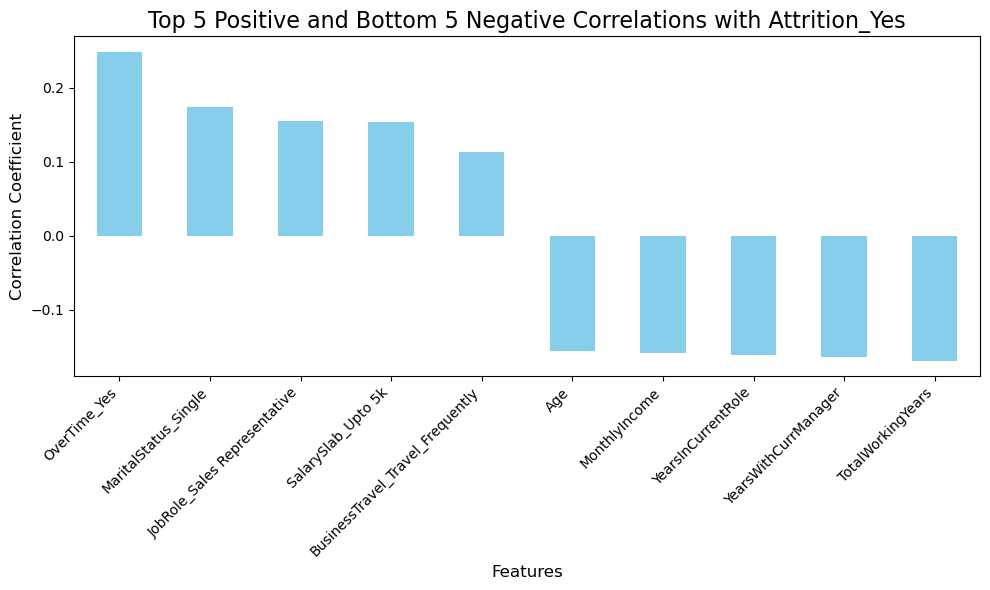

In [15]:
# Look at correlations to attrition_yes
att_corr = pd.DataFrame(correlation_matrix['Attrition_Yes'].sort_values(ascending=False))

# Extract the top 5 and bottom 5 correlations
att_corr = att_corr.dropna()
top_5 = att_corr.head(6)
top_5 = top_5[1:] # Remove Attrition_Yes (corr = 1)
bottom_5 = att_corr.tail(5)

# Combine top 5 and bottom 5 into a single DataFrame
combined = pd.concat([top_5, bottom_5])

# Create a bar plot
plt.figure(figsize=(10, 6))
combined['Attrition_Yes'].plot(kind='bar', color='skyblue')
plt.title('Top 5 Positive and Bottom 5 Negative Correlations with Attrition_Yes', fontsize=16)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

We can see that there are not many strong linear correlations with Attrition_Yes. However, we will ensure to keep the variables seen above in the Top 5 / Bottom 5 correlation visual for our modeling.

### Observe classes in target

In [16]:
att_raw['Attrition'].value_counts()

Attrition
No     1242
Yes     238
Name: count, dtype: int64

Our target variable appears to be class imbalanced, so we will use F1 score for our primary model evaluation metric. We will also try SMOTE (Synthetic Minority Oversampling Technique) to see if we can create synthetically balanced classes.

# Prep Data for Modeling / Data Preprocessing

#### Drop duplicates

In [17]:
# Drop rows that are duplicates across all columns
att = att_raw.drop_duplicates()
att.shape

(1473, 37)

In [18]:
# For duplicate employee IDs, drop the second record
att = att[~att.index.duplicated(keep="first")]
att.shape

(1470, 37)

#### Impute missing values for `YearsWithCurrManager` using RandomForestRegressor()

In [19]:
print(correlation_matrix['YearsWithCurrManager'].sort_values(ascending=False))

YearsWithCurrManager            1.000000
YearsAtCompany                  0.764294
YearsInCurrentRole              0.714728
YearsSinceLastPromotion         0.512005
TotalWorkingYears               0.458996
                                  ...   
Attrition_Yes                  -0.163367
JobRole_Sales Representative   -0.169404
SalarySlab_Upto 5k             -0.323546
EmployeeCount                        NaN
StandardHours                        NaN
Name: YearsWithCurrManager, Length: 74, dtype: float64


In [20]:
# Predictors (from above)
predictors = ["YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "TotalWorkingYears"]

# Train model on rows without missing values for YearsWithCurrManager
train = att.dropna(subset=["YearsWithCurrManager"])

# Make predictions for rows with missing values
to_predict = att[att["YearsWithCurrManager"].isna()]

In [21]:
X_train = train[predictors]
y_train = train["YearsWithCurrManager"]

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
# Predict missing values
X_missing = to_predict[predictors]
y_pred = model.predict(X_missing)

att.loc[att["YearsWithCurrManager"].isna(), "YearsWithCurrManager"] = y_pred

In [23]:
# Display the first few rows with imputed values
att[att.index.isin(set(to_predict.index))].head(5)

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmpID,,,,,,,,,,,,,,,,,,,,,
RM024,21,18-25,No,Travel_Rarely,391,Research & Development,15,2,Life Sciences,1,...,4,80,0,0,6,3,0,0,0,0.000000
RM363,21,18-25,No,Non-Travel,895,Sales,9,2,Medical,1,...,3,80,0,3,3,2,3,2,2,1.988056
RM207,22,18-25,No,Travel_Rarely,1136,Research & Development,5,3,Life Sciences,1,...,1,80,1,4,2,2,4,2,2,2.364048
RM139,25,18-25,No,Travel_Rarely,959,Sales,28,3,Life Sciences,1,...,4,80,0,6,3,3,2,2,2,1.772267
RM256,25,18-25,No,Travel_Rarely,685,Research & Development,1,3,Life Sciences,1,...,4,80,2,5,3,3,4,2,1,1.901878


In [24]:
# Validate there are no longer any missing values
print(f'Missing values in YearsWithCurrManager col after imputation: {att["YearsWithCurrManager"].isna().sum()}')  

Missing values in YearsWithCurrManager col after imputation: 0


#### Remove unnecessary columns

In [25]:
# Drop features that are not needed
# EmployeeCount - all equal to 1
# StandardHours - all equal to 80.5
# Over18 - all Y

cat_features_to_drop = ['Over18']
categorical_features_new = [col for col in categorical_features if col not in cat_features_to_drop]

num_features_to_drop = ['EmployeeCount','StandardHours']
numerical_features_new = [col for col in numerical_features if col not in num_features_to_drop]

features_to_drop = cat_features_to_drop
features_to_drop.extend(num_features_to_drop)

att = att.drop(columns=features_to_drop)

#### Split into X, y, train, and test

In [26]:
# Define X and y
X = att.drop(columns=['Attrition'])  
y = att['Attrition'].map({'Yes': 1, 'No': 0}) 

# Train, test - using gridsearch so don't need validation set
# Stratify y since we have class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
X.shape

(1470, 33)

Our final models will use 33 of the original features.

#### Encode and scale features, with SMOTE

We will try our models with the Synthetic Minority Oversampling Technique (SMOTE) and without it, to see which preprocessing techniques perform better.

In [28]:
# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features_new)
    ],
    remainder='passthrough'  # Keep the numerical features
)

# Fit and transform X_train, transform X_test
X_train_smote = preprocessor.fit_transform(X_train)
X_test_smote = preprocessor.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_smote, y_train)

# Scale the data (after SMOTE)
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test_smote = scaler.transform(X_test_smote)

#### Encode and scale features, without SMOTE

In [29]:
# Create the ColumnTransformer
# Scale numerical features
# One Hot Encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_new),
        ('cat', OneHotEncoder(drop='first'), categorical_features_new)
    ])

# Fit on X_train and transform both X_train and X_test
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Modeling

### Logistic Regression

In [30]:
def log_reg_model(X_train, X_test, y_train, y_test):
    # Define the parameter grid for grid search CV
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10],  
        'penalty': ['l1', 'l2'],  
        'solver': ['liblinear', 'saga'],
        'class_weight': ['balanced', None]
    }

    # Initialize Logistic Regression model
    log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

    # Initialize Grid Search with cross-validation
    grid_search = GridSearchCV(log_reg, param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # Get the best estimator and make predictions using the best model
    log_reg = grid_search.best_estimator_
    y_pred_log = log_reg.predict(X_test)

    # Classification report for evaluating model performance
    print(classification_report(y_test, y_pred_log))

    return log_reg, y_pred_log

In [31]:
# Without SMOTE
log_reg, y_pred_log = log_reg_model(X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       247
           1       0.69      0.57      0.63        47

    accuracy                           0.89       294
   macro avg       0.81      0.76      0.78       294
weighted avg       0.88      0.89      0.89       294



In [32]:
# With SMOTE
log_reg_smote, y_pred_log_smote = log_reg_model(X_train_smote, X_test_smote, y_train_smote, y_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
              precision    recall  f1-score   support

           0       0.96      0.78      0.86       247
           1       0.41      0.81      0.55        47

    accuracy                           0.79       294
   macro avg       0.68      0.79      0.70       294
weighted avg       0.87      0.79      0.81       294



Our logistic regression model trained without SMOTE achieved a 89% overall accuracy, indicating strong predictive performance. However, examining class-level metrics reveals an imbalance in recall and precision, particularly for the minority class (Class 1, Attrition = Yes). While the model performs well for non-attrition cases (precision = 0.92, recall = 0.95, f1-score = 0.94), its ability to correctly identify attrition cases is weaker (precision = 0.69, recall = 0.57, f1-score = 0.63). This suggests the model struggles with false negatives, meaning it may fail to identify employees at risk of leaving. 

Our logistic regression model trained with SMOTE achieved a lower overall accuracy of 79%, but it showed significant improvement in identifying attrition cases. Recall for Class 1 improved significantly to 81%, meaning the model correctly identified most employees at risk of leaving. Precision dropped to 41%, indicating more false positives (predicting attrition when it doesn't occur). For the non-attrition class, precision remained high at 96%, but recall decreased to 78%.

Given these metrics, SMOTE helps the model focus on the minority class, improving recall for attrition cases, which is critical for identifying at-risk employees. However, it comes with a trade-off in precision and overall accuracy.

### Decision Tree

In [33]:
def dt_model(X_train, X_test, y_train, y_test):
    param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
    }

    dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

    grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    dt = grid_search.best_estimator_
    y_pred_dt = dt.predict(X_test)

    print(classification_report(y_test, y_pred_dt))

    return dt, y_pred_dt

In [34]:
# Without SMOTE
dt, y_pred_dt = dt_model(X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       247
           1       0.40      0.49      0.44        47

    accuracy                           0.80       294
   macro avg       0.65      0.67      0.66       294
weighted avg       0.82      0.80      0.81       294



In [35]:
# With SMOTE
dt_smote, y_pred_dt_smote = dt_model(X_train_smote, X_test_smote, y_train_smote, y_test)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       247
           1       0.46      0.49      0.47        47

    accuracy                           0.83       294
   macro avg       0.68      0.69      0.69       294
weighted avg       0.83      0.83      0.83       294



The decision tree model, without SMOTE, achieved an initial overall accuracy of 80%, coupled with sub-optimal performance on the attrition class. With SMOTE, the model performed slighlty better on both classes, leading to a higher overall accuracy of 83%. However, the precision of 46% and recall of 49% for Class 1 highlights a problem, as the model still has a relatively high amount of false positives (indicated by a low precision) and a high amount of false negatives (indicated by low recall).

Given this analysis, SMOTE modestly improved the attrition classification; however, the model's ability to capture and forecast attrition cases is still relatively low.

### SVM Model

In [36]:
def svm_model(X_train, X_test, y_train, y_test):
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [0.01, 0.1, 1, 'scale'],
        'kernel': ['rbf'],
        'class_weight': ['balanced']
    }

    svc = SVC(random_state=42, probability=True, class_weight='balanced')

    grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    svc = grid_search.best_estimator_
    y_pred_svc = svc.predict(X_test)

    print(classification_report(y_test, y_pred_svc))    

    return svc, y_pred_svc

In [37]:
# Without SMOTE
svm, y_pred_svm = svm_model(X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       247
           1       0.52      0.51      0.52        47

    accuracy                           0.85       294
   macro avg       0.71      0.71      0.71       294
weighted avg       0.85      0.85      0.85       294



The SVM model achieved an 85% overall accuracy, which is an improvement over the decision tree but still lower than the logistic regression. It performs well for the non-attrition class (precision = 0.91, recall = 0.91, f1-score = 0.91), but struggles with attrition cases (precision = 0.52, recall = 0.51, f1-score = 0.52), indicating that it has difficulty identifying employees at risk of leaving. The macro average (0.71) shows a relatively balanced performance, but there's still a notable imbalance in the model's ability to handle the minority class. 

## Ensemble Models

### Random Forest

In [38]:
def rf_model(X_train, X_test, y_train, y_test):
    param_grid = {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'class_weight': ['balanced', None]
    }

    rf = RandomForestClassifier(random_state=42, class_weight='balanced')
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    rf = grid_search.best_estimator_
    y_pred_rf = rf.predict(X_test)

    print(classification_report(y_test, y_pred_rf))  

    return rf, y_pred_rf

In [39]:
# Without SMOTE
rf, y_pred_rf = rf_model(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.87      0.96      0.92       247
           1       0.57      0.28      0.37        47

    accuracy                           0.85       294
   macro avg       0.72      0.62      0.64       294
weighted avg       0.83      0.85      0.83       294



In [40]:
# With SMOTE
rf_smote, y_pred_rf_smote = rf_model(X_train_smote, X_test_smote, y_train_smote, y_test)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       247
           1       0.88      0.30      0.44        47

    accuracy                           0.88       294
   macro avg       0.88      0.64      0.69       294
weighted avg       0.88      0.88      0.86       294



The Random Forest model trained without SMOTE achieved an 85% overall accuracy, which is similar to the SVM model but with a significant difference in performance across the two classes. For the non-attrition class (precision = 0.87, recall = 0.96, f1-score = 0.92), it performs very well, capturing the majority of non-attrition cases. However, for the attrition class (precision = 0.57, recall = 0.28, f1-score = 0.37), the model's performance is weak, particularly in terms of recall, where it misses many actual attrition cases. The macro average (0.64) reflects the imbalance in performance, and while the model has a solid weighted average (0.83), it still struggles with identifying employees at risk of leaving.

With SMOTE, the random forest model increased to 88% accuracy and had a slight performance increase for attrition recall performance, from 28% to 30%. This indicates that the random forest models have a high number of false negatives, while the precision at 88% suggests a low number of false positives. A desirable relationship between the 2 metrics is low precision and high recall (if they are conflicting), given that we would rather incorrectly predict "Yes" than "No" for Attrition.

### XG Boost

In [41]:
def xgb_model(X_train, X_test, y_train, y_test):
    scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

    param_grid_xgb = {
        'n_estimators': [200, 500],
        'learning_rate': [0.05, 0.1],
        'max_depth': [5, 7],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'scale_pos_weight': [scale_pos_weight]
    }

    xgb = XGBClassifier(random_state=42, eval_metric='logloss')

    grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, scoring='f1', cv=5, n_jobs=-1, verbose=1)
    grid_search_xgb.fit(X_train, y_train)

    xgb = grid_search_xgb.best_estimator_
    y_pred_xgb = xgb.predict(X_test)

    print(classification_report(y_test, y_pred_xgb))    

    return xgb, y_pred_xgb

In [42]:
# Without SMOTE
xgb, y_pred_xgb = xgb_model(X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       247
           1       0.70      0.49      0.57        47

    accuracy                           0.88       294
   macro avg       0.80      0.72      0.75       294
weighted avg       0.87      0.88      0.88       294



In [43]:
# With SMOTE
xgb_smote, y_pred_xgb_smote = xgb_model(X_train_smote, X_test_smote, y_train_smote, y_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       247
           1       0.79      0.47      0.59        47

    accuracy                           0.89       294
   macro avg       0.85      0.72      0.76       294
weighted avg       0.89      0.89      0.88       294



The XGBoost model without SMOTE achieved an overall accuracy of 88%. However, like the other models, a performance imbalance is present. It has a strong ability to predict non-attrition cases (precision = 0.91, recall = 0.96, F1-score = 0.93), but has limited effectiveness in predicting attrition cases (precision = 0.70, recall = 0.49, F1-score = 0.57).

The XGBoost model trained with SMOTE had a slightly higher overall accuracy of 89%. Precision of Attrition increased to 79% and the F1-score increased to 59%.

Given this analysis, XGBoost with SMOTE would be the primary recommendation between the two, due to having a minor attrition rate prediction improvement.

### Cat Boost

In [44]:
def cat_model(X_train, X_test, y_train, y_test):

    param_grid_cat = {
        'iterations': [300, 600],
        'learning_rate': [0.01, 0.05],
        'depth': [5, 7],
        'l2_leaf_reg': [2, 4],
        'border_count': [32, 50],
        'auto_class_weights': ['Balanced']
    }

    cat = CatBoostClassifier(random_state=42, verbose=0)

    grid_search_cat = GridSearchCV(cat, param_grid_cat, scoring='f1', cv=5, n_jobs=-1, verbose=1)
    grid_search_cat.fit(X_train, y_train)

    cat = grid_search_cat.best_estimator_
    y_pred_cat = cat.predict(X_test)

    print(classification_report(y_test, y_pred_cat))

    return cat, y_pred_cat

In [45]:
# Without SMOTE
cat, y_pred_cat = cat_model(X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       247
           1       0.47      0.66      0.55        47

    accuracy                           0.83       294
   macro avg       0.70      0.76      0.72       294
weighted avg       0.86      0.83      0.84       294



In [46]:
# With SMOTE
cat_smote, y_pred_cat_smote = cat_model(X_train_smote, X_test_smote, y_train_smote, y_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       247
           1       0.75      0.38      0.51        47

    accuracy                           0.88       294
   macro avg       0.82      0.68      0.72       294
weighted avg       0.87      0.88      0.86       294



The CatBoost model without SMOTE performs well for the non-attrition class (precision = 0.93, recall = 0.86, f1-score = 0.89), but for the attrition class (precision = 0.47, recall = 0.66, f1-score = 0.55), the model faces challenges with false positives and identifying attrition cases. However, given that we are interested in predicting employee attrition, we are okay with a higher amount of false positives (incorrectly predicting "Yes") and a lower amount of false negatives (incorrectly predicting "No").

With SMOTE, the CatBoost model performs better for the non-attrition class and worse for the attrition class. 

In CatBoost's case, SMOTE decreased performance and ability to recognize and predict attrition in a workforce.

# Model Evaluation

### Compare Results

In [47]:
roc_scores = {
    "Logistic Regression": roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]),
    "Logistic Regression (SMOTE)": roc_auc_score(y_test, log_reg_smote.predict_proba(X_test)[:, 1]),
    "Decision Tree": roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]),
    "Decision Tree (SMOTE)": roc_auc_score(y_test, dt_smote.predict_proba(X_test)[:, 1]),
    "SVM": roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1]),
    "Random Forest": roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]),
    "Random Forest (SMOTE)": roc_auc_score(y_test, rf_smote.predict_proba(X_test)[:, 1]),
    "XGBoost": roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]),
    "XGBoost (SMOTE)": roc_auc_score(y_test, xgb_smote.predict_proba(X_test)[:, 1]),
    "CatBoost": roc_auc_score(y_test, cat.predict_proba(X_test)[:, 1]),
    "CatBoost (SMOTE)": roc_auc_score(y_test, cat_smote.predict_proba(X_test)[:, 1])
}

model_reports = {
    "Logistic Regression": classification_report(y_test, y_pred_log, output_dict=True),
    "Logistic Regression (SMOTE)": classification_report(y_test, y_pred_log_smote, output_dict=True),
    "Decision Tree": classification_report(y_test, y_pred_dt, output_dict=True),
    "Decision Tree (SMOTE)": classification_report(y_test, y_pred_dt_smote, output_dict=True),
    "SVM": classification_report(y_test, y_pred_svm, output_dict=True),
    "Random Forest": classification_report(y_test, y_pred_rf, output_dict=True),
    "Random Forest (SMOTE)": classification_report(y_test, y_pred_rf_smote, output_dict=True),
    "XGBoost": classification_report(y_test, y_pred_xgb, output_dict=True),
    "XGBoost (SMOTE)": classification_report(y_test, y_pred_xgb_smote, output_dict=True),
    "CatBoost": classification_report(y_test, y_pred_cat, output_dict=True),
    "CatBoost (SMOTE)": classification_report(y_test, y_pred_cat_smote, output_dict=True)
}

df_reports = pd.DataFrame(model_reports).T

df_summary = df_reports.apply(lambda x: x["weighted avg"], axis=1).apply(pd.Series)

# Rename columns
df_summary = df_summary.rename(columns={
    "precision": "Weighted Avg Precision",
    "recall": "Weighted Avg Recall",
    "f1-score": "Weighted Avg F1-Score"
})

df_summary["AUC-ROC"] = df_summary.index.map(roc_scores)
df_summary = df_summary.drop(columns="support")
df_summary

,Weighted Avg Precision,Weighted Avg Recall,Weighted Avg F1-Score,AUC-ROC
Logistic Regression,0.884918,0.891156,0.886961,0.877940
Logistic Regression (SMOTE),0.868735,0.785714,0.809663,0.473254
Decision Tree,0.818093,0.799320,0.807546,0.693772
Decision Tree (SMOTE),0.831037,0.826531,0.828683,0.500000
SVM,0.845627,0.846939,0.846270,0.825825
Random Forest,0.825089,0.850340,0.828151,0.810578
Random Forest (SMOTE),0.880289,0.880952,0.855178,0.539280
XGBoost,0.874302,0.884354,0.875828,0.816091
XGBoost (SMOTE),0.886783,0.894558,0.883154,0.470152
CatBoost,0.856267,0.826531,0.837645,0.829615


In [48]:
# Extract class 1 metrics
df_class_1 = df_reports.apply(lambda x: x["1"], axis=1).apply(pd.Series)

df_class_1 = df_class_1.rename(columns={
    "precision": "Class 1 Precision",
    "recall": "Class 1 Recall",
    "f1-score": "Class 1 F1-Score"
})

df_class_1["AUC-ROC"] = df_class_1.index.map(roc_scores)
df_class_1 = df_class_1.drop(columns="support")
df_class_1

,Class 1 Precision,Class 1 Recall,Class 1 F1-Score,AUC-ROC
Logistic Regression,0.692308,0.574468,0.627907,0.877940
Logistic Regression (SMOTE),0.413043,0.808511,0.546763,0.473254
Decision Tree,0.396552,0.489362,0.438095,0.693772
Decision Tree (SMOTE),0.460000,0.489362,0.474227,0.500000
SVM,0.521739,0.510638,0.516129,0.825825
Random Forest,0.565217,0.276596,0.371429,0.810578
Random Forest (SMOTE),0.875000,0.297872,0.444444,0.539280
XGBoost,0.696970,0.489362,0.575000,0.816091
XGBoost (SMOTE),0.785714,0.468085,0.586667,0.470152
CatBoost,0.469697,0.659574,0.548673,0.829615


We can see that our Logistic Regression model (without SMOTE) performed the best by looking at the weighted average F1-score, AUC-ROC, and the Class 1 (Attrition = Yes) metrics. The weighted average F1 score provides us with a more informative assessment of model performance (as compared to macro F1 scores), given that our target variable has class imbalance. Finally, by examining the Attrition class metrics, given that we are concerned with accurately predicting whether an employee will leave or not, we can see that Logistic Regression also performs the best for this particular class.

Given that the target variable is binary `{Attrition: Yes, No}`, Logistic Regression intuitively makes sense as the best model to use for this analysis.

### Evaluate True Positives, True Negatives, False Positives, and False Negatives

In [49]:
# Create a dataframe for misclassified records
y_probs = log_reg.predict_proba(X_test)[:, 1] 

residuals_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred_log,
    "Probability_Positive": y_probs
})

misclassified = residuals_df[residuals_df["Actual"] != residuals_df["Predicted"]]
misclassified.head()

,Actual,Predicted,Probability_Positive
EmpID,,,
RM1247,1,0,0.267589
RM1237,1,0,0.265585
RM861,1,0,0.056110
RM712,1,0,0.488157
RM919,0,1,0.824288


In [50]:
print(f'Percentage of misclassified results: {len(misclassified) / len(residuals_df):.1%}')

Percentage of misclassified results: 10.9%


The misclassification analysis reveals that the logistic regression model incorrectly predicts employee attrition 10% of the time. While it successfully predicts non-attrition cases, the model often misclassifies employees who actually left the company (attrition cases), assigning them lower probabilities of attrition. For these misclassified cases, the predicted probabilities for attrition are relatively low, indicating that the model lacks confidence in its predictions for these individuals. The discrepancies between the actual and predicted values suggest that the model may be underfitting or that certain important features or interactions are missing. 

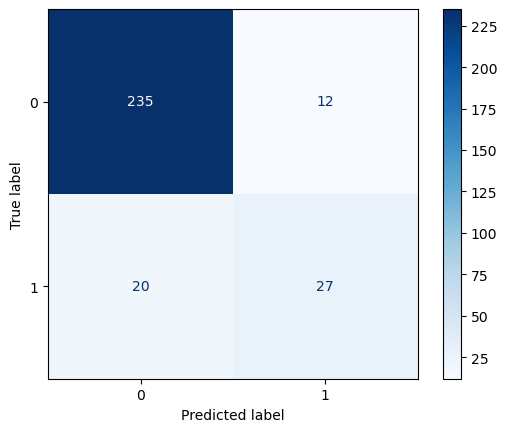

In [51]:
# Confusion matrix to evaluate False Positives and False Negatives
cm = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

Our logistic regression model demonstrates a moderate ability to predict employee attrition based on the confusion matrix. It's quite accurate in identifying employees who will not leave (235 correct predictions). However, the precision (69.2%) indicates that some of the employees flagged as at-risk for leaving will, in fact, stay. Again, this is okay for our analysis given that we would rather "over-predict" Attrition than "under-predict". However, on this note, the recall (57.4%) suggests that a significant portion of employees who *will* leave are being missed by the model. The F1-score of 62.7% reflects this trade-off. While the model provides a starting point for identifying attrition risk, improving its recall is a priority to minimize missed cases.

### ROC Curve

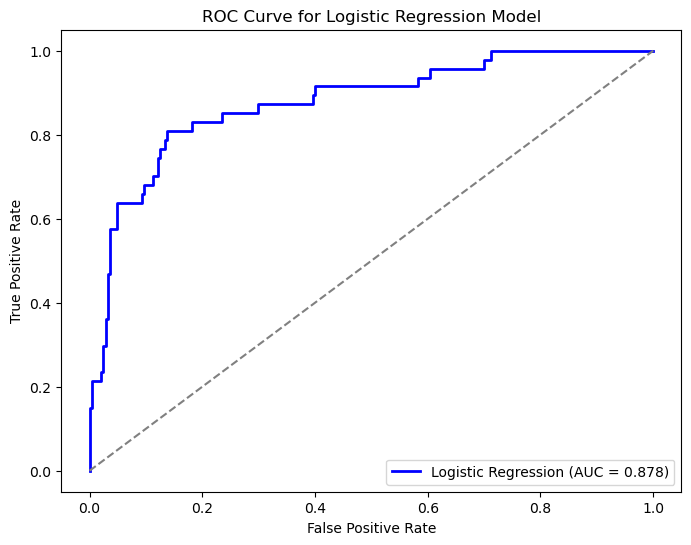

In [52]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"Logistic Regression (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression Model")
plt.legend(loc="lower right")
plt.show()

The large arch in the ROC curve indicates that the logistic regression model is doing a good job of distinguishing between employees who are likely to stay and those who are likely to leave. This large arch suggests that the model is capturing the relationships well and making accurate predictions, with relatively few false positives or false negatives.

### Feature Importance

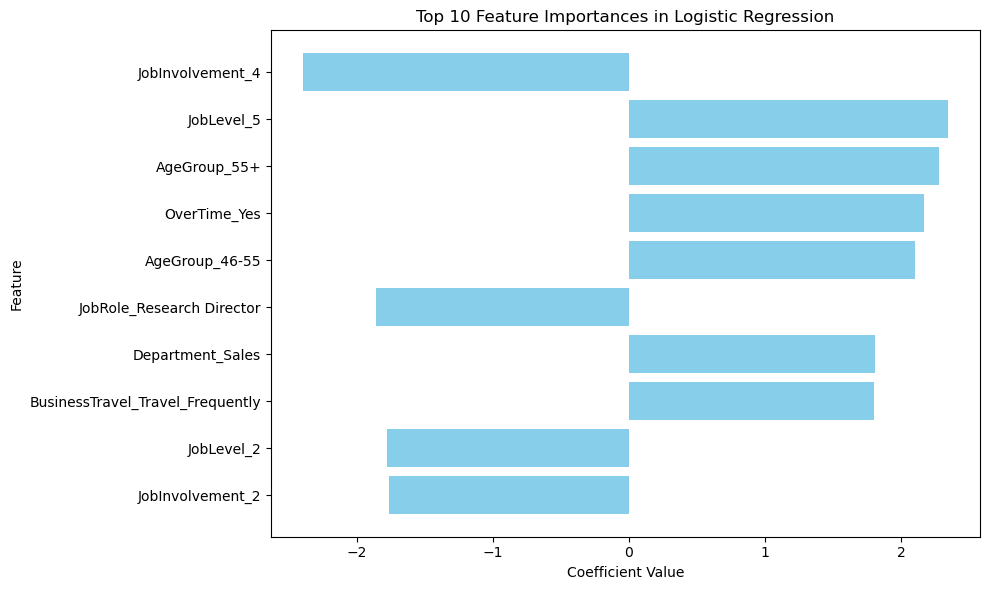

In [53]:
# Get feature names after one-hot encoding
feature_names = numerical_features_new + list(
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features_new))

# Feature importance using coefficients
coefficients = log_reg.coef_[0]
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort features by absolute coefficient value
feature_importance['Absolute Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Absolute Coefficient', ascending=False)

# Plotting
top_n = 10
top_features = feature_importance.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Feature Importances in Logistic Regression')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

The feature importance analysis reveals several key factors influencing employee attrition. Employees with high job involvement (level 4) are less likely to leave, while those at higher job levels (level 5) and in older age groups (55+) are more likely to leave. Working overtime and being in the 46-55 age group also increase the likelihood of attrition. Job roles such as research director and employees in lower job levels (level 2) show a lower likelihood of leaving, while those in the sales department and those who travel frequently for business have a higher likelihood of leaving. Overall, job involvement, age group, job level, and overtime play significant roles in predicting attrition, with varying impacts based on employee characteristics and roles.

# Future Improvements and Recommendations

### Potential Model Improvements

**Feature Engineering**
- Create Interaction Terms: Explore combining features to capture more complex relationships
- Polynomial Features: Add polynomial features for numerical variables

**Hyperparameter Tuning**
- Regularization (L1/L2): Experiment with penalty='l1' (Lasso) or penalty='l2' (Ridge) and adjust the C parameter

**SMOTE Adjustments**
- Try ADASYN or BorderlineSMOTE instead of regular SMOTE (potentially reduce noise)
- Experiment with different sampling_strategy values in SMOTE. Instead of oversampling to a 50/50 balance, try a smaller ratio

**Feature Selection**
- Use techniques like Recursive Feature Elimination (RFE) or SelectFromModel (with a tree-based estimator) to select the most relevant features

### Business Recommendations

Overtime: Evaluate work-life balance; consider offering flexible hours or additional support to reduce burnout.​
Stock Option Level: Review and enhance stock option plans or offer performance-linked financial benefits to engage employees.​
Monthly Income: Ensure competitive compensation through salary benchmarking and performance-based bonuses.​
Job Satisfaction: Invest in employee engagement initiatives, such as feedback surveys, team-building, and career development.​
Distance from Home: Offer flexible work options or commuting allowances to reduce stress from long commutes.​